In [99]:

# Name: Mahmoud Wael , ID: 20200505
# Name: Abdallah Mohsen , ID: 20200304
# Name: Ahmed Ali , ID: 20200030


import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

In [100]:
# Importing the dataset
data = pd.read_csv('data_banknote_authentication.csv')

# Shuffling the dataset
data = shuffle(data)

# Selecting the 'Variance' and 'Skewness' columns
features = data[['Variance', 'Skewness']]

# Standardizing the dataset
Standardized_Data = (features - features.mean()) / features.std()

# Scattering plot the data
plt.scatter(Standardized_Data.iloc[:, 0] , Standardized_Data.iloc[:, 1], c = data['Class'])
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Scatter Plot of the Data')

# Splitting the data into labels and features
Y_labels = data['Class'].values
X_features = Standardized_Data[['Variance', 'Skewness']].values
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_labels, test_size = 0.3)

SyntaxError: invalid syntax (383037020.py, line 13)

In [ ]:
def activation_func(x):
    return np.where(x > 0 , 1, 0)
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = 0.0
        self.bias = 0.0
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0 , 1, 0)
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = activation_func(linear_output)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = activation_func(linear_output)
        return y_predicted

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

Perceptron accuracy 0.9890909090909091


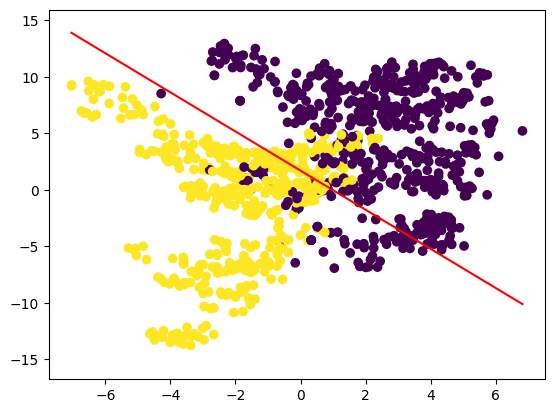

In [ ]:

df = pd.read_csv(r'data_banknote_authentication.csv')
df = np.array(df)
y = df[0:-1, 4]
X = df[0:-1, 0:4]



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

p = Perceptron(learning_rate=0.001, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron accuracy", accuracy(y_test, predictions))


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "red")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

In [ ]:
class Adaline:

    def __init__(self, learning_rate=0.0001, no_iterations=1000):
        self.learning_rate = learning_rate
        self.no_iterations = no_iterations

    def fit(self, X, Y):
        no_samples, no_features = X.shape
        self.weights = np.zeros(no_features)
        self.bias = 0
        self.costs = []

        for i in range(self.no_iterations):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = Y - output
            self.weights += self.learning_rate * X.T.dot(errors)
            self.bias += self.learning_rate * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.costs.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0, 1, -1)

    def Calculate_Accuracy(self, X_test, Y_test):
        Y_predict = self.predict(X_test)
        accuracy = np.sum(Y_test == Y_predict) / len(Y_test)
        return accuracy

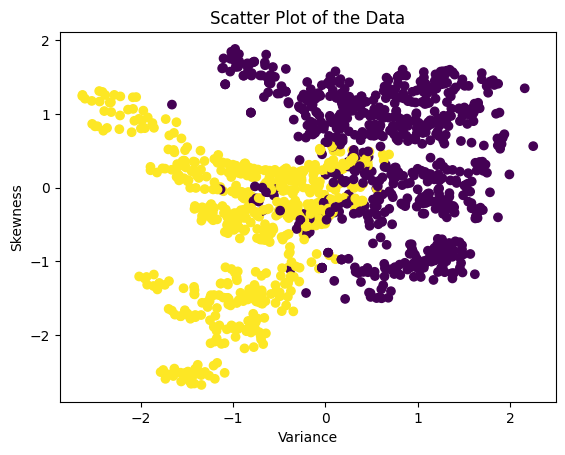

In [ ]:
data = pd.read_csv('data_banknote_authentication.csv')

# Shuffling the dataset
data = shuffle(data)

# Selecting the 'Variance' and 'Skewness' columns
features = data[['Variance', 'Skewness']]

# Standardizing the dataset
Standardized_Data = (features - features.mean()) / features.std()

# Scattering plot the data
plt.scatter(Standardized_Data.iloc[:, 0] , Standardized_Data.iloc[:, 1], c = data['Class'])
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Scatter Plot of the Data')

# Splitting the data into labels and features
Y_labels = data['Class'].values
X_features = Standardized_Data[['Variance', 'Skewness']].values
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_labels, test_size = 0.3)

The Adaline model accuracy: 0.41504854368932037


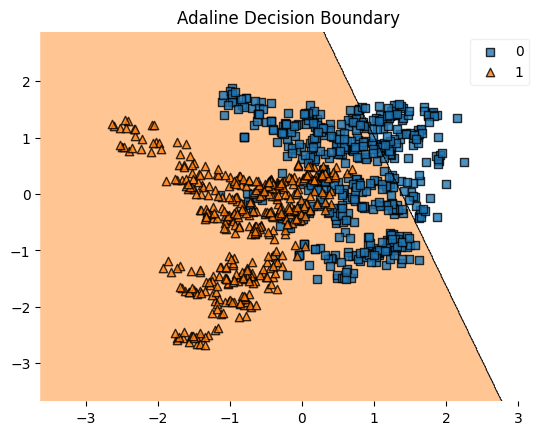

In [ ]:
adaline = Adaline()
adaline.fit(X_train, Y_train)
A_Accuracy = adaline.Calculate_Accuracy(X_test, Y_test)
print("The Adaline model accuracy:", A_Accuracy)

# Plotting the decision boundary of the Adaline model
fig = plt.subplots()
plot_decision_regions(X_train, Y_train, clf = adaline)
plt.title('Adaline Decision Boundary')
plt.show()